In [132]:
##### Pense bête #####
"""
Meilleur apprentissage : https://scikit-learn.org/stable/modules/tree.html
Meilleur visualisation : https://mljar.com/blog/visualize-decision-tree/

https://www.youtube.com/watch?v=wxS5P7yDHRA
https://www.youtube.com/watch?v=xDWZzD4TPO0
https://www.youtube.com/watch?v=D0efHEJsfHo
Faire varier les paramètres
Tester sur deuxième jeu de données
Rendre notebok plus joli pour la présentation

"""

'\nMeilleur apprentissage : https://scikit-learn.org/stable/modules/tree.html\nMeilleur visualisation : https://mljar.com/blog/visualize-decision-tree/\n\nhttps://www.youtube.com/watch?v=wxS5P7yDHRA\nhttps://www.youtube.com/watch?v=xDWZzD4TPO0\nhttps://www.youtube.com/watch?v=D0efHEJsfHo\nFaire varier les paramètres\nTester sur deuxième jeu de données\nRendre notebok plus joli pour la présentation\n\n'

In [133]:
##### Jeu de données #####

# Import des données
import pandas as pd
pam50 = pd.read_csv("Data_Pam50.csv")

# Extraction des features (niveau d'expression de divers gènes) et des labels (type de cancer)
features = pam50[pam50.columns[2:]]
labels = pam50["subtype"]
print("features :", list(features.columns))


# Séparation du jeux d'apprentissage et du jeu de test
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25)

# Petit jeu de données => Il faut vérifier que toutes les classes sont présentes dans le jeu de test
print("train_labels :", train_labels.unique())
print("test_labels :", test_labels.unique())


features : ['ACTR3B', 'ANLN', 'BAG1', 'BCL2', 'BIRC5', 'BLVRA', 'CCNB1', 'CCNE1', 'CDC20', 'CDC6', 'CDCA1', 'CDH3', 'CENPF', 'CEP55', 'CXXC5', 'EGFR', 'ERBB2', 'ESR1', 'EXO1', 'FGFR4', 'FOXA1', 'FOXC1', 'GPR160', 'GRB7', 'KIF2C', 'KNTC2', 'KRT14', 'KRT17', 'KRT5', 'MAPT', 'MDM2', 'MELK', 'MIA', 'MKI67', 'MLPH', 'MMP11', 'MYBL2', 'MYC', 'NAT1', 'ORC6L', 'PGR', 'PHGDH', 'PTTG1', 'RRM2', 'SFRP1', 'SLC39A6', 'TMEM45B', 'TYMS', 'UBE2C', 'UBE2T']
train_labels : ['Her2' 'LumA' 'LumB' 'Basal' 'Normal']
test_labels : ['Basal' 'Normal' 'LumA' 'Her2' 'LumB']


In [134]:
##### Entrainement #####
from sklearn import tree
classifier = tree.DecisionTreeClassifier(max_depth = 3)
print (classifier.get_params())
classifier = classifier.fit(train_features, train_labels)

"""
Stopping criterias (chose 1 ):
max_depth : try different values
...
__________________________________
Approach :
criterion : "gini" / "entropy"
splitter : "best" / "random"
max_features : base splitting on only some parameters, not all
random_states : seed for random seed
__________________________________
class_weight : it's worse making a mistake on class 1 than class 2
ccp_alpha : used to prune the tree and prevent overfitting

"""


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


'\nStopping criterias (chose 1 ):\nmax_depth : try different values\n...\n__________________________________\nApproach :\ncriterion : "gini" / "entropy"\nsplitter : "best" / "random"\nmax_features : base splitting on only some parameters, not all\nrandom_states : seed for random seed\n__________________________________\nclass_weight : it\'s worse making a mistake on class 1 than class 2\nccp_alpha : used to prune the tree and prevent overfitting\n\n'

              precision    recall  f1-score   support

       Basal       1.00      1.00      1.00         3
        Her2       0.60      0.43      0.50         7
        LumA       0.67      0.67      0.67         3
        LumB       0.29      1.00      0.44         2
      Normal       0.00      0.00      0.00         3

    accuracy                           0.56        18
   macro avg       0.51      0.62      0.52        18
weighted avg       0.54      0.56      0.52        18



<AxesSubplot:>

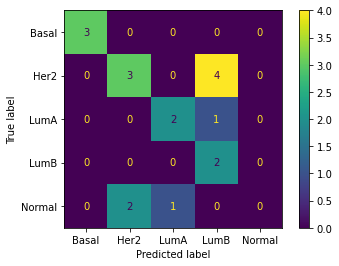

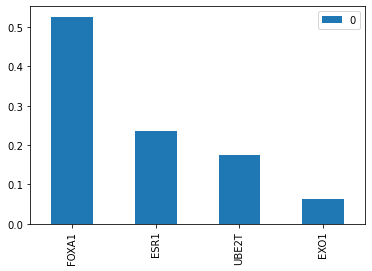

In [135]:
##### Test #####
predictions = classifier.predict(test_features)
predict_probas = classifier.predict_proba(test_features)

from sklearn import metrics 
print(metrics.classification_report(test_labels, predictions, zero_division = 0))
metrics.plot_confusion_matrix(classifier, test_features, test_labels)

feature_importance = pd.DataFrame(classifier.feature_importances_, index = features.columns).sort_values(0, ascending=False)
feature_importance = feature_importance[feature_importance[0] > 0]
feature_importance.plot(kind = "bar")


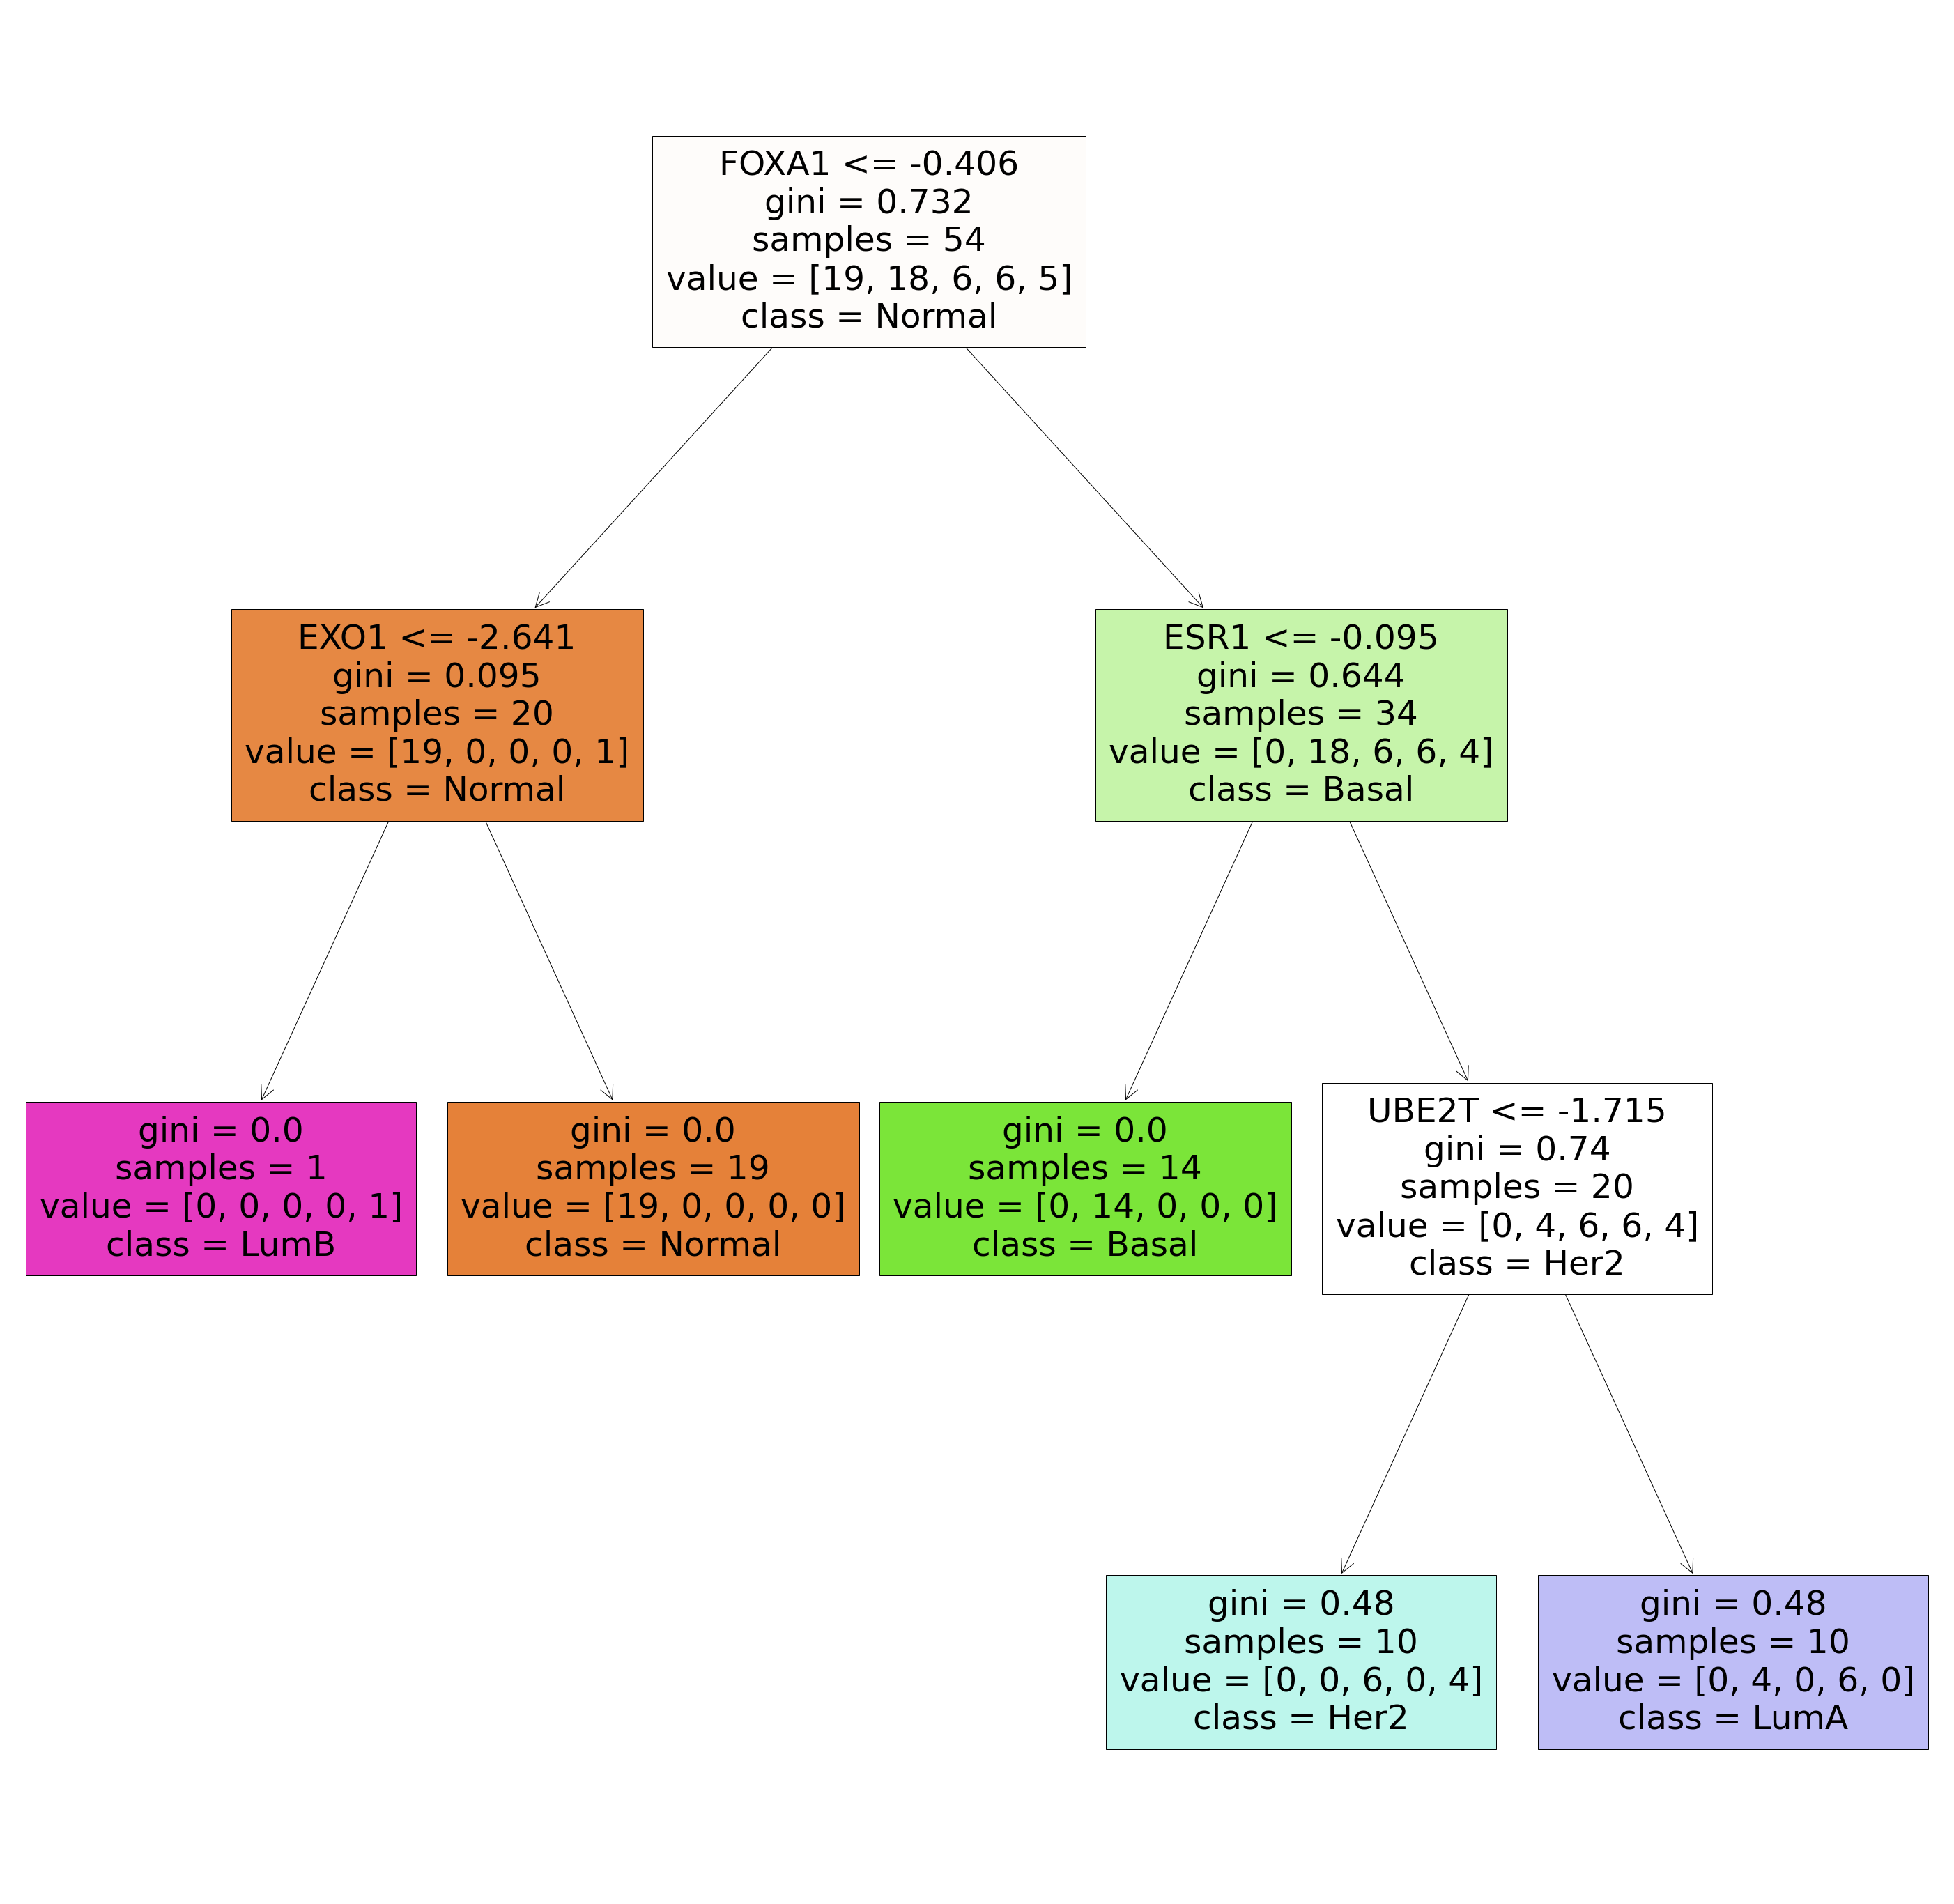

In [136]:
# Visualisation arbre
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(50,50)
tree.plot_tree(classifier, 
    feature_names=list(features.columns),
    class_names=labels.unique(),
    filled=True)
fig.savefig("decistion_tree.png")